In [1]:
import sys
from pathlib import Path
from collections import Counter
import timeit
import pickle

In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [3]:
data_dir = Path.cwd().parent.joinpath('src').joinpath('data')
vis_dir = Path.cwd().parent.joinpath('src').joinpath('visualization')
feature_dir = Path.cwd().parent.joinpath('src').joinpath('features')
sys.path.insert(1, str(data_dir))
sys.path.insert(1, str(vis_dir))
sys.path.insert(1, str(feature_dir))

In [4]:
from hit_generator import stochastic
from util import plot_in_RAM, small_helix_check, hits2arc

In [5]:
track_dir = Path.cwd().parent.joinpath('data').joinpath('raw')
db_list = ["train_CeEndpoint-mix-fromCSV_1.db",
               "train_CeEndpoint-mix-fromCSV_2.db",\
               "train_CeEndpoint-mix-fromCSV_3.db"]
file_list = [track_dir.joinpath(db) for db in db_list]

In [6]:
dist = uniform(loc=1, scale=0)

In [7]:
gen = stochastic(dist=dist, db_files=file_list, hitNumCut=20)

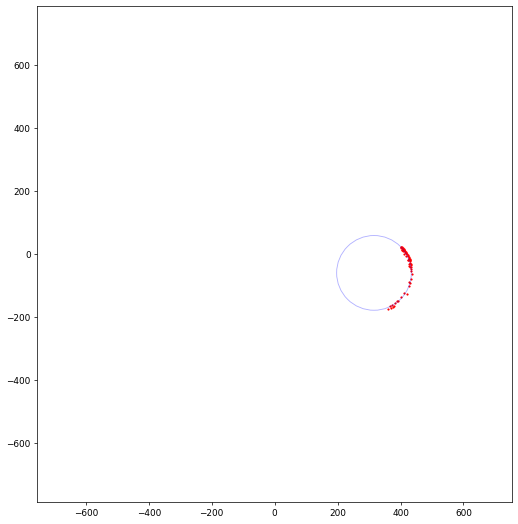

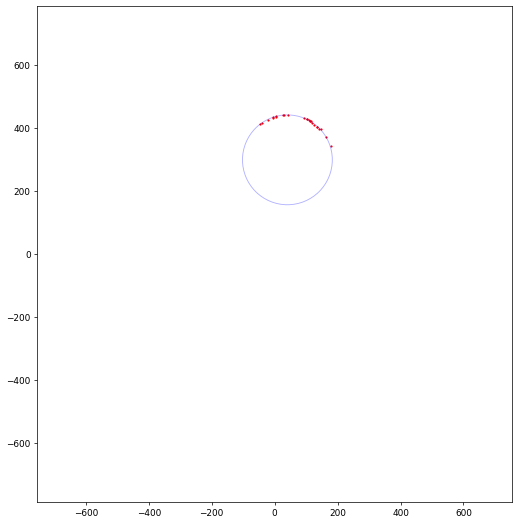

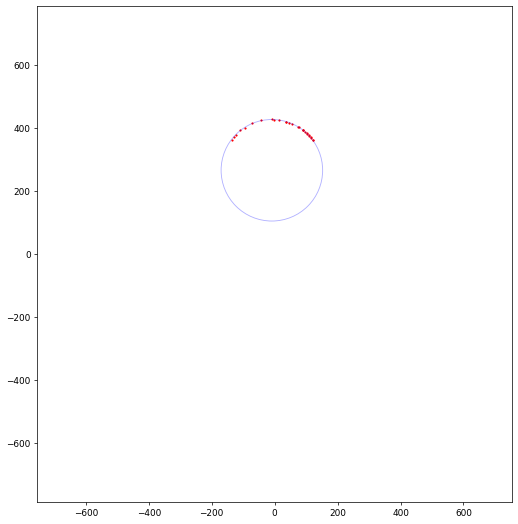

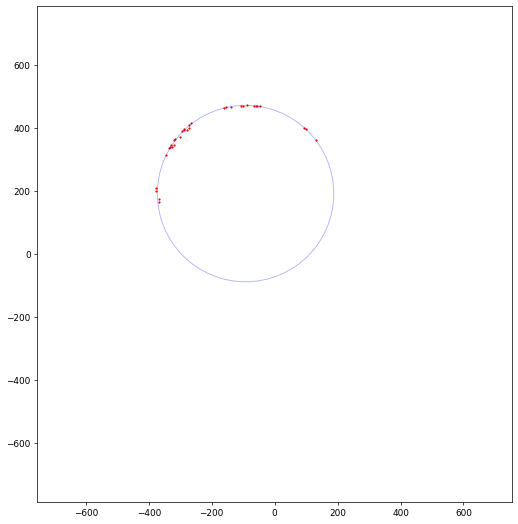

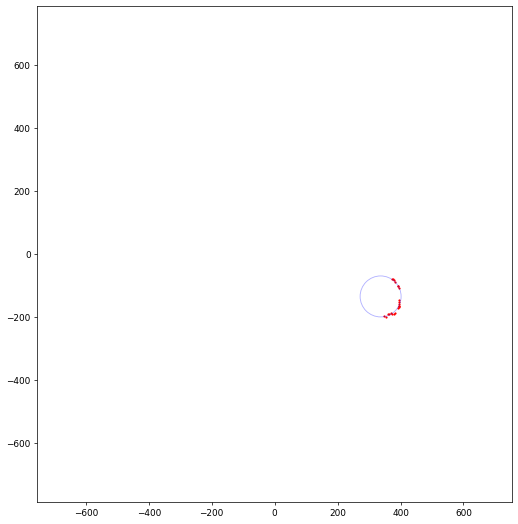

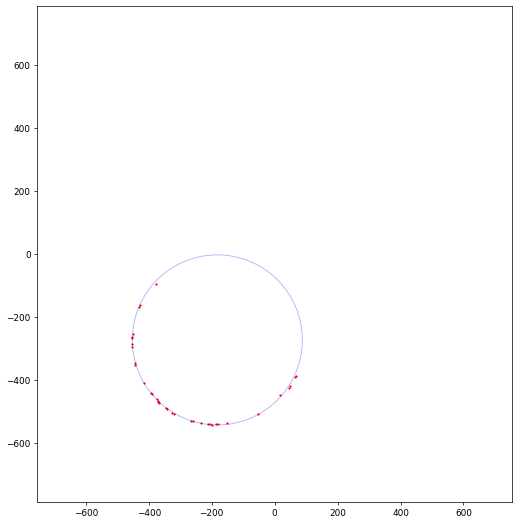

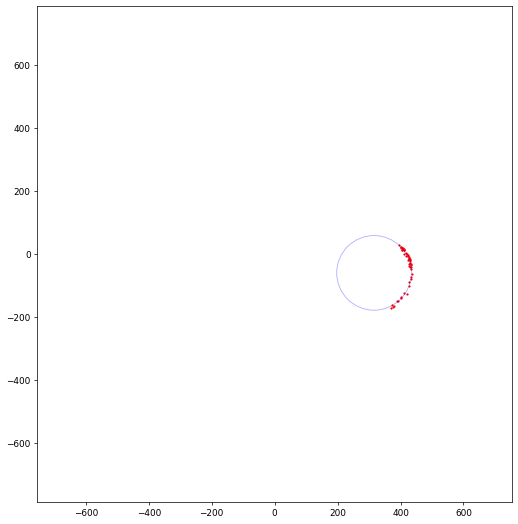

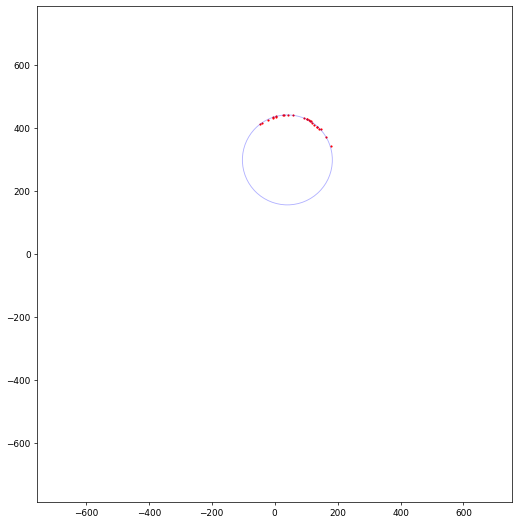

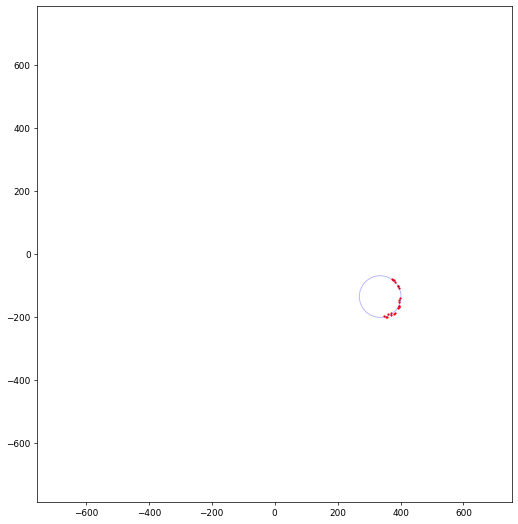

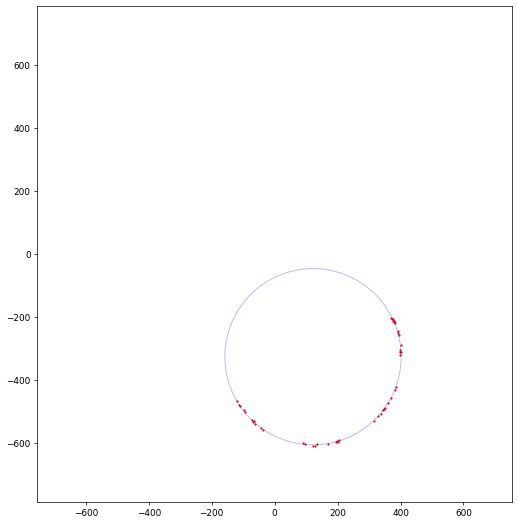

In [9]:
N_data = 10
N_generated = 0
resolution = 512

layout = {'pad':0, 'h_pad':0, 'w_pad':0, 'rect':(0,0,1,1) }
while N_generated < N_data:
    hit_dict = gen.generate(mode='production')
    if small_helix_check(hit_dict,dx_min=100,dy_min=100):
        continue
    else:
        a, b, R = hits2arc(hit_dict)
        
        hits = [ it for k, it in hit_dict.items()]
        xs = []
        ys = []
        for hit in hits:
            xs.append(hit[0])
            ys.append(hit[1])
        fig, ax = plt.subplots(figsize=(8,8), dpi=resolution/8, frameon=False, tight_layout=layout)

        circle = plt.Circle((a,b), R, color='b', alpha=0.3, fill=False)
        ax.add_patch(circle)
        
        ax.scatter(xs, ys, c='r', s=2)
        
        ax.set_aspect('equal', adjustable='datalim')
        
        
        ax.set(xlim=[-810, 810], ylim=[-810, 810])

        plt.show()
        N_generated += 1

In [10]:
def discretize(x, min, max, res):
    # return the discretized index of a value given a range and resolution
    step = (max-min)/res
    result = (x-min)//step
    if result >= res:
        result = res-1
    return int(result)

def xy2map(xs, ys, res):
    # return a z-t ptcl number map
    map = np.zeros(shape=(res,res), dtype=float)
    xmin, xmax = -810, 810
    ymin, ymax = -810, 810

    for x, y in zip(xs, ys):
        xIdx = discretize(x, xmin, xmax, res)
        yIdx = discretize(y, ymin, ymax, res)
        map[res-1-yIdx, xIdx] = 1.0

    return map

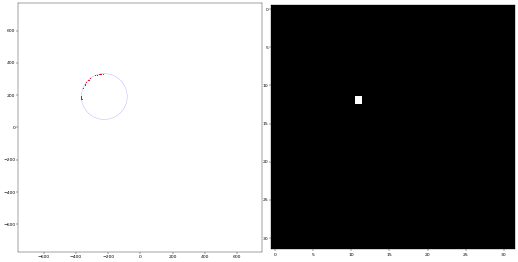

In [16]:
N_data = 1
N_generated = 0
resolution = 256

layout = {'pad':0, 'h_pad':0, 'w_pad':0, 'rect':(0,0,1,1) }
while N_generated < N_data:
    hit_dict = gen.generate(mode='production')
    if small_helix_check(hit_dict,dx_min=100,dy_min=100):
        continue
    else:
        a, b, R = hits2arc(hit_dict)
        
        hits = [ it for k, it in hit_dict.items()]
        xs = []
        ys = []
        for hit in hits:
            xs.append(hit[0])
            ys.append(hit[1])
        fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8), dpi=resolution/8, frameon=False, tight_layout=layout)

        circle = plt.Circle((a,b), R, color='b', alpha=0.3, fill=False)
        ax1.add_patch(circle)
        ax1.scatter(xs, ys, c='r', s=2)
        ax1.set_aspect('equal', adjustable='datalim')
        ax1.set(xlim=[-810, 810], ylim=[-810, 810])
        
        map = xy2map([a], [b], int(resolution/8))
        ax2.imshow(map, cmap='gray', vmin=0, vmax=1)

        plt.show()
        N_generated += 1